# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data_path = "../data/txt/"

In [7]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


Ajouter manuellement les mots qu'on souhaite enlever de la liste pour le nuage de mots 

Bien nettoyer la liste des mots et revérifier le nuage de mots.

## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [8]:
# Choisir une décennie
DECADE = '1940'

In [9]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [11]:
files[:5]

['KB_JB838_1940-01-04_01-00001.txt',
 'KB_JB838_1940-01-05_01-00009.txt',
 'KB_JB838_1940-01-07_01-00014.txt',
 'KB_JB838_1940-01-10_01-00003.txt',
 'KB_JB838_1940-01-11_01-00004.txt']

In [10]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [13]:
texts[0][:400]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREAUX ET FILS SPÉCIAUX: — — ■ ; S Un an 170.00 Congo • j Six mol , 85X0 Etranger : Prix euivant conventions VENTE ET ABONNEM. : PLACE DE LOUVAIN. 23 □ SALLE DE DÉPÊCHES : 124. RUE ROYALE BRUXELLES G “ ■“"

In [15]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for f in files:
    with open(os.path.join(data_path, f), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [16]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

1000

In [17]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREA"

In [21]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f"_{DECADE[:-1]}.txt"), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [22]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f"_{DECADE[:-1]}.txt"), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREAUX ET FILS SPÉCIAUX: — — ■ ; S Un an 170.00 Congo • j Six mol , 85X0 Etranger : Prix euivant conventions VENTE ET ABONNEM. : PLACE DE LOUVAIN. 23 □ SALLE DE DÉPÊCHES : 124. RUE ROYALE BRUXELLES G “ ■“ 10 ANNONCES : AGENCE ROS8EL, R. ROYALE. 122 . • ' -), . . JEUDI 4 JANVIER 1940. Ed». à 14. h. 00 5 "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [45]:
def clean_text(DECADE, folder=None):
    if folder is None:
        input_path = f"_{DECADE[:-1]}.txt"
        output_path = f"_{DECADE}_clean.txt"
    else:
        input_path = f"{folder}/_{DECADE[:-1]}.txt"
        output_path = f"{folder}/_{DECADE}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [46]:
clean_text(DECADE, folder=temp_path)

'Output has been written in ../data/tmp/_1940_clean.txt!'

In [48]:
# Vérifier le résultat
with open(os.path.join(temp_path, f"_{DECADE}_clean.txt"), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'ANNEE PAGES GRAND DUCHÉ CENTIMES FRANCE CENTIME ABONNEMENTS PROVINCE PROVINCE ABONNE POSTE VÜLE ŒOL BUREAUX FILS SPÉCIAUX CONGO SIX MOL ETRANGER PRIX EUIVANT CONVENTIONS VENTE ABONNEM PLACE LOUVAIN SALLE DÉPÊCHES RUE ROYALE BRUXELLES ANNONCES AGENCE ROYALE JEUDI JANVIER ÉDITIONS EDIT NUIT DERNIÈRE EDIT NUIT QUELLE HEURE LAQUELLE ACHETIEZ SOIR DEMANDEZ VENDEUR DERNIÈRE ÉDITION PARUE LONDRES FLEET STREET AGGLOMÉRATION BRUXELLOISE ABONNER MOIS FILS SPECIALFX PARIS LONBRES TELEPHONE BERLIN GENEVE BU'

## Nuage de mots

### Afficher les termes les plus fréquents


In [49]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 25081), ('BRUXELLES', 15230), ('TÉL', 13328), ('PRIX', 9832), ('ECR', 8550), ('ECRIRE', 8129), ('BON', 7785), ('MAISON', 7542), ('ANS', 7127), ('TRÈS', 6662)]


### Créer, stocker et afficher le nuage de mots

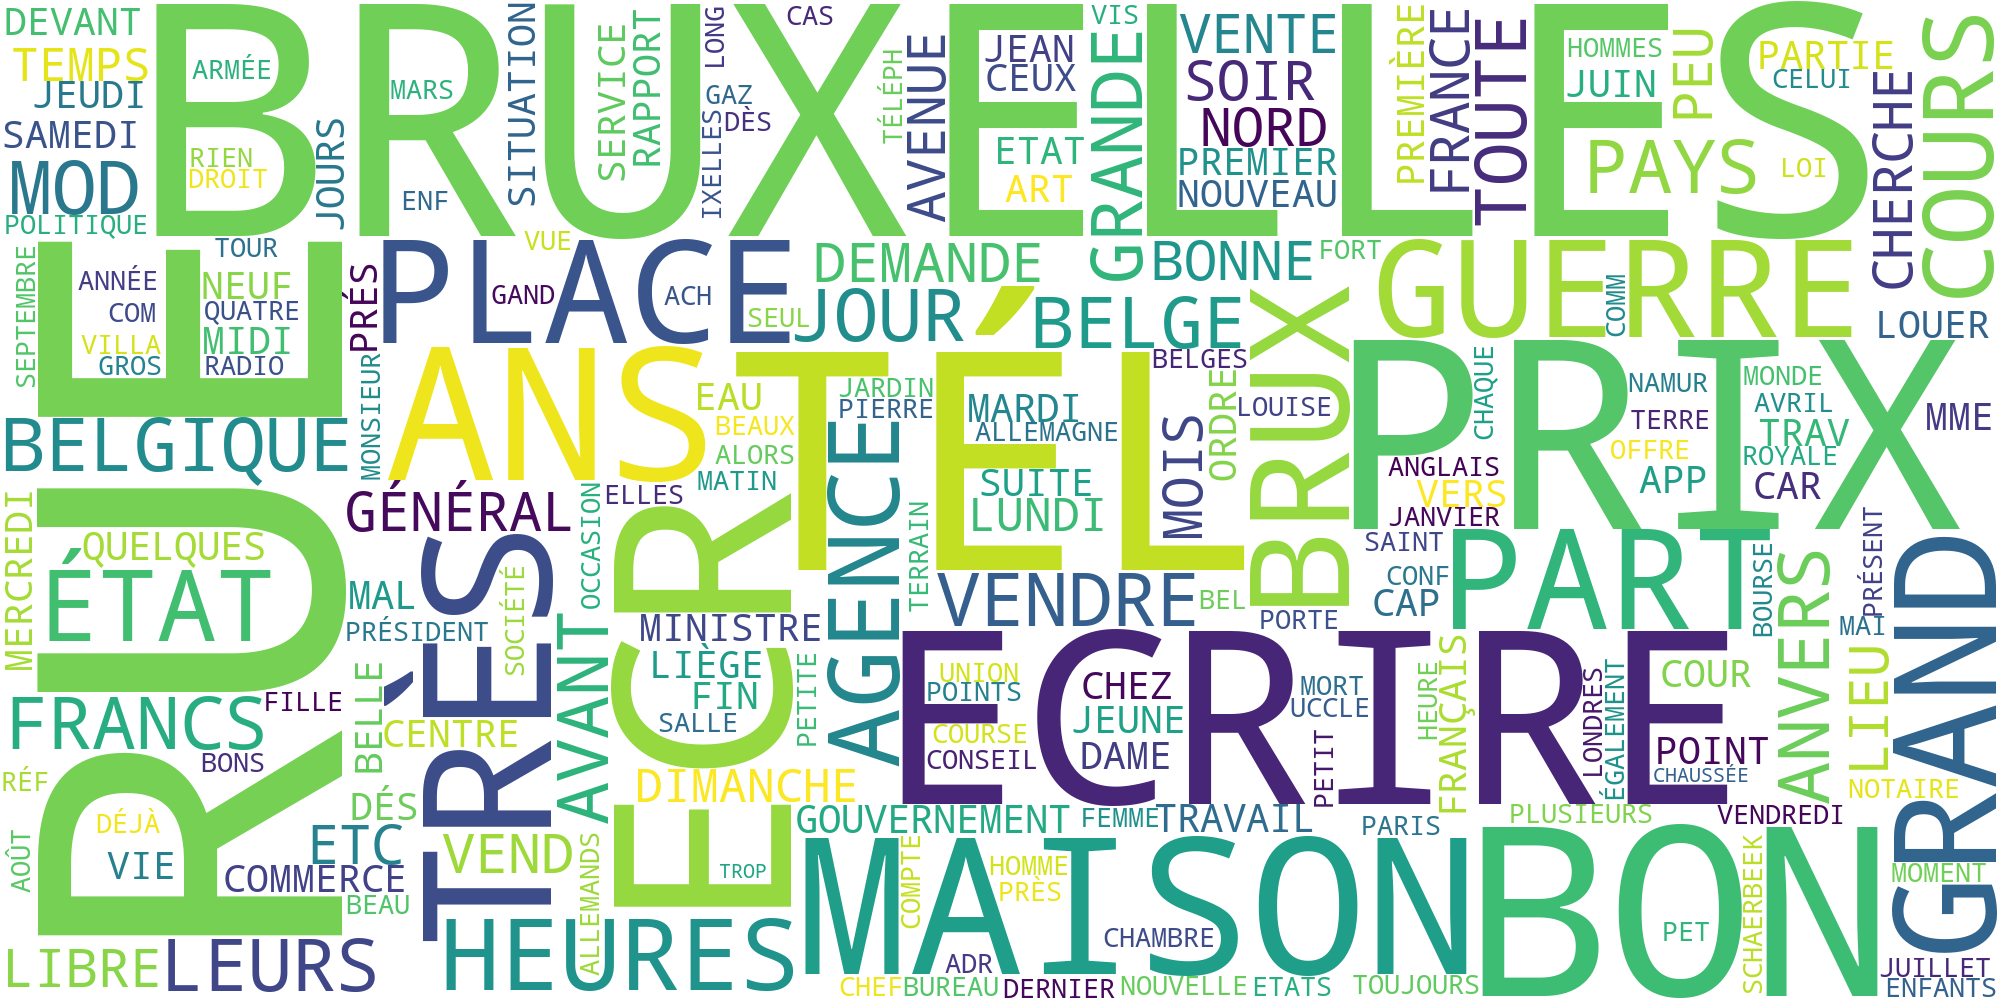

In [51]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{DECADE}.png"))
Image(filename=os.path.join(temp_path, f"{DECADE}.png"))